In [20]:
import nilearn
from nilearn import plotting
from nilearn import datasets
from nilearn import image
from nilearn.image import mean_img
from nilearn.datasets import MNI152_FILE_PATH

import numpy as np
import pandas as pd

## Averiguação da shape do dataset e importação do mesmo

In [11]:
path='C:\\Users\\Asus\\Documents\\3oAno\\Estágio\\Dados'

n_subjects=1
n_sessions=1
n_runs=3
sub='sub-000%d' %n_subjects
ses='ses-00%d' %n_sessions

fmri_img=[]
dataset_shape=[]
events_PATH=[]
idx=1

for i in range(n_runs):
    if n_runs<10:
        run='run-0%d' %idx
    if n_runs>=10:
        run='run-%d' %idx
    fmri_img.append('%s\\%s\\%s\\%s\\%s_%s_task-innerspeech_%s_bold_pp_standard.nii' % (path,sub,ses,run,sub,ses,run))
    dataset_shape.append(image.load_img(fmri_img[i]).shape)
    
    # load events.tsv
    events_PATH.append('%s\\%s_%s_task-innerspeech_%s_events.tsv' % (path,sub,ses,run))

    idx=idx+1

C:\Users\Asus\Documents\3oAno\Estágio\Dados\sub-0001\ses-001\run-01\sub-0001_ses-001_task-innerspeech_run-01_bold_pp_standard.nii
(91, 109, 91, 258)
C:\Users\Asus\Documents\3oAno\Estágio\Dados\sub-0001_ses-001_task-innerspeech_run-01_events.tsv
C:\Users\Asus\Documents\3oAno\Estágio\Dados\sub-0001\ses-001\run-02\sub-0001_ses-001_task-innerspeech_run-02_bold_pp_standard.nii
(91, 109, 91, 258)
C:\Users\Asus\Documents\3oAno\Estágio\Dados\sub-0001_ses-001_task-innerspeech_run-02_events.tsv
C:\Users\Asus\Documents\3oAno\Estágio\Dados\sub-0001\ses-001\run-03\sub-0001_ses-001_task-innerspeech_run-03_bold_pp_standard.nii
(91, 109, 91, 258)
C:\Users\Asus\Documents\3oAno\Estágio\Dados\sub-0001_ses-001_task-innerspeech_run-03_events.tsv


## Eventos

In [12]:
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_design_matrix

tr = 2  # repetition time is 2 seconds
n_scans = dataset_shape[0][3]  # the acquisition comprises ?? scans
frame_times = np.arange(n_scans) * tr  # here are the correspoding frame times

# load events.tsv

events_df = pd.read_csv(events_PATH[0], sep='\t', na_values="n/a")


## Criação da tabela design_matrix (por fases e não betas)

In [13]:
hrf_model='spm'
design_matrix = make_first_level_design_matrix(frame_times, events_df,
                                    drift_model='polynomial', drift_order=3,
                                    hrf_model=hrf_model)

<AxesSubplot:label='conditions', ylabel='scan number'>

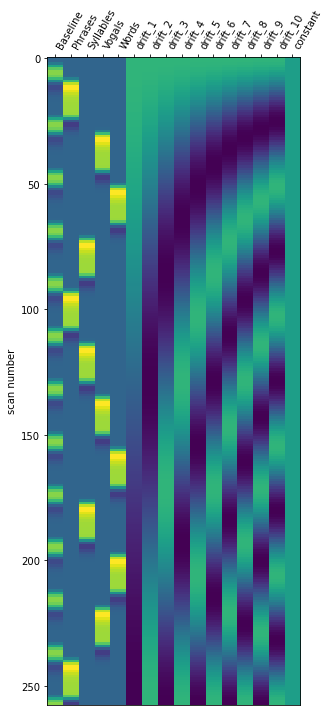

In [15]:
from nilearn.glm.first_level import FirstLevelModel

first_level_model = FirstLevelModel(tr)
first_level_model = first_level_model.fit(fmri_img[0], events=events_df)
design_matrix = first_level_model.design_matrices_[0]
plot_design_matrix(design_matrix)

In [16]:
contrast_matrix = np.eye(design_matrix.shape[1])
basic_contrasts = dict([(column, contrast_matrix[i])
                        for i, column in enumerate(design_matrix.columns)])
basic_contrasts

{'Baseline': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Phrases': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Syllables': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Vogals': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Words': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'drift_1': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'drift_2': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'drift_3': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'drift_4': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'drift_5': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'drift_6': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'drift_7': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.

In [17]:
fmri_glm4mask = FirstLevelModel()
fmri_glm4mask = fmri_glm4mask.fit(image.load_img(fmri_img[0]), design_matrices=design_matrix)

## As linhas abaixo será para criação de máscaras

In [18]:
#contraste entre frases e baseline

basic_contrasts['+Tasks-Baseline'] = (
    (basic_contrasts['Phrases'] + - basic_contrasts['Baseline']) +
    (basic_contrasts['Syllables'] - basic_contrasts['Baseline']) + 
    (basic_contrasts['Vogals'] - basic_contrasts['Baseline']) + 
    (basic_contrasts['Words'] - basic_contrasts['Baseline']))
basic_contrasts['+Tasks-Baseline']

array([-4.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

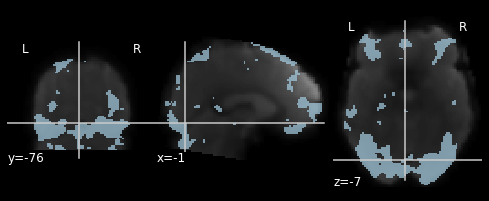

In [21]:
from nilearn.input_data import NiftiMasker

mean_image = image.mean_img(fmri_img[0])

masker = NiftiMasker()

brain_mask_map = fmri_glm4mask.compute_contrast(basic_contrasts['+Tasks-Baseline'], output_type='z_score')

brain_mask= nilearn.image.threshold_img(brain_mask_map, threshold=3, copy=False)
masker.fit(brain_mask)
brain_mask=masker.mask_img_
plotting.plot_roi(brain_mask, bg_img=mean_image,
                  cmap='Paired')

## Importação da brain_mask (caso se queira usar gm)

In [22]:
#brain_mask = datasets.load_mni152_brain_mask()

#from nilearn.datasets import fetch_icbm152_brain_gm_mask
#brain_mask = fetch_icbm152_brain_gm_mask()

## Beta-series

In [23]:
onset=[]
duration=[]
trialtype=[]

labels=[]

onsett=0
evtt=0

for idx in range(len(events_df)-1):
    block_event=events_df.loc[idx]

    num_evts=block_event['duration']/tr

    for evt in range(int(num_evts)):

        onset.append(onsett)
        onsett+=tr

        duration.append(tr)

        trialtype.append(evtt)
        evtt+=1

        labels.append(block_event['trial_type'])


events_bs = pd.DataFrame({'trial_type': trialtype,
                       'onset': onset,
                       'duration': duration})
events_bs

,trial_type,onset,duration
0,0,0,2
1,1,2,2
2,2,4,2
3,3,6,2
4,4,8,2
...,...,...,...
247,247,494,2
248,248,496,2
249,249,498,2
250,250,500,2


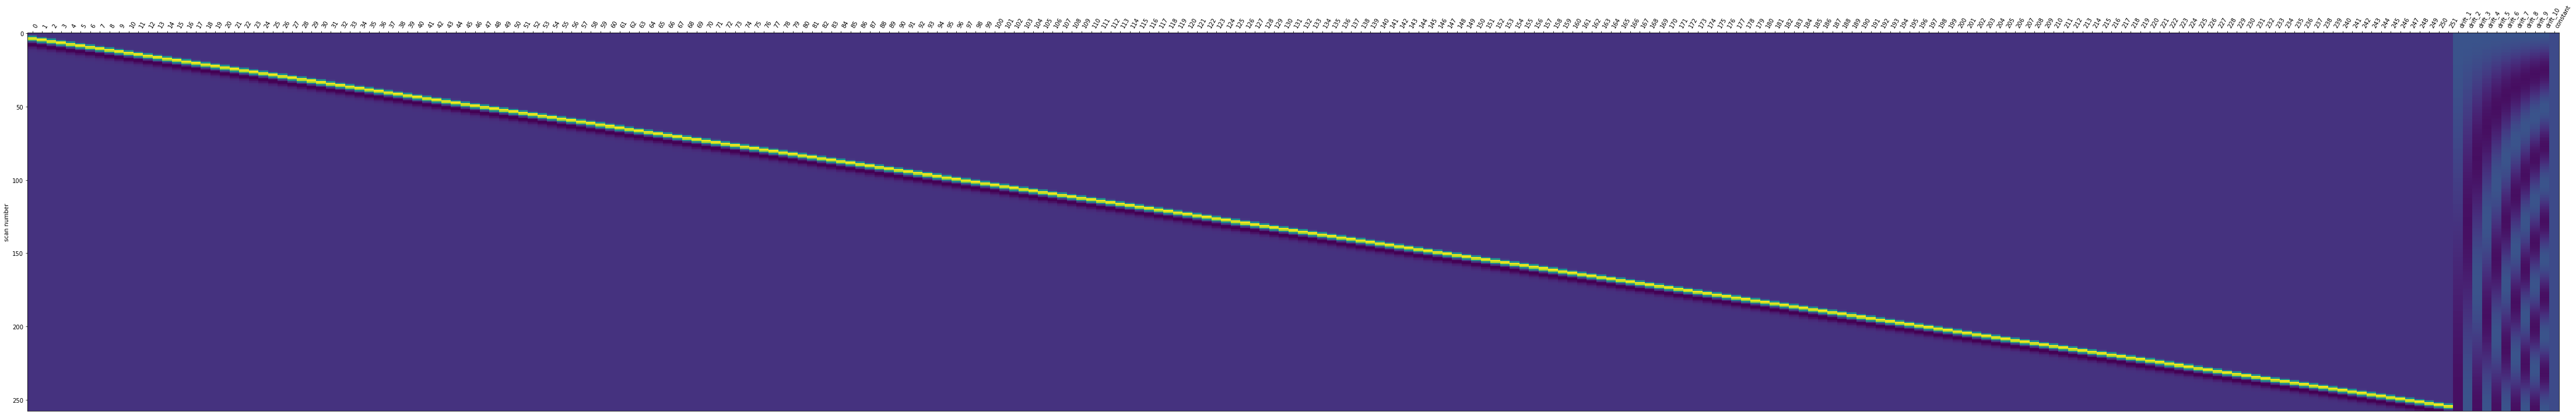

In [24]:
first_level_model = first_level_model.fit(fmri_img[0], events=events_bs)
design_matrix = first_level_model.design_matrices_[0]
plot_design_matrix(design_matrix)
design_matrix.drop({'drift_1', 'drift_2', 'drift_3', 'drift_4', 'drift_5', 'drift_6', 'drift_7', 'drift_8', 'drift_9', 'drift_10', 'constant'}, axis='columns', inplace=True)

## Contrastes

In [28]:
contrast_matrix = np.eye(design_matrix.shape[1])
basic_contrasts = dict([(column, contrast_matrix[i]) for i, column in enumerate(design_matrix.columns)])
    

fmri_glm = FirstLevelModel()
fmri_glm = fmri_glm.fit(fmri_img[0], design_matrices=design_matrix)


z_map=[]

for idx in range(len(basic_contrasts)):
    z_map.append(fmri_glm.compute_contrast(basic_contrasts[idx], output_type='z_score'))

In [89]:
#Teste de imagem
#plotting.plot_stat_map(
#    z_map[0], bg_img=mean_image, threshold=2, display_mode='mosaic', black_bg=True, title='test')
#plotting.show()

## Cross-validation

In [90]:
len(z_map)

252

In [91]:
len(labels)

252

In [29]:
from nilearn.decoding import Decoder 
import time

start = time.time()

n_folds=3;
estimator='svc'
decoder = Decoder(
estimator=estimator, mask=brain_mask,
standardize=True, cv=n_folds,
)

decoder.fit(z_map, labels)

print(decoder.cv_scores_)

end = time.time()
print(end - start)

D:\3oAno\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\3oAno\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\3oAno\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\3oAno\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\3oAno\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed

{'Baseline': [0.5236111111111111, 0.5263888888888889, 0.5215277777777778], 'Phrases': [0.5603864734299517, 0.5768115942028986, 0.5381642512077295], 'Syllables': [0.4956521739130435, 0.4975845410628019, 0.5024154589371981], 'Vogals': [0.5062801932367149, 0.5304347826086956, 0.514975845410628], 'Words': [0.5217391304347826, 0.5256038647342995, 0.5285024154589373]}
3427.995495080948
